## Now lets compare the working of DBSCAN and kmeans clustering on a real world dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split as tt
from scipy.spatial.distance import cdist



In [3]:
df=pd.read_csv('Mall_customers.csv')

In [5]:
df.shape

(200, 5)

In [7]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df_new=df[['Annual Income (k$)','Spending Score (1-100)']]
df_new.columns=['Income','Spending']



In [13]:
df_new.shape

(200, 2)

## Dataset visualization
We decided to use only two features of datset for clustering as it will be easier for visualization

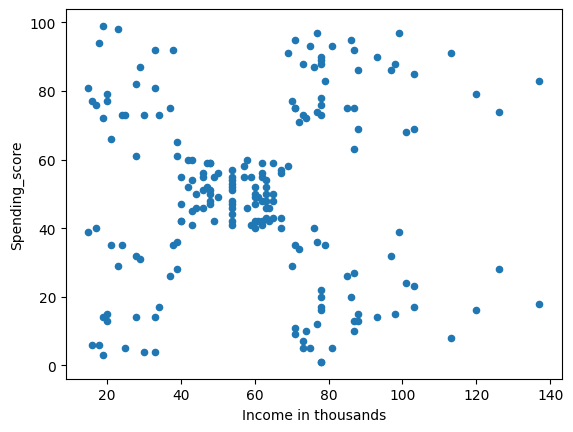

In [15]:
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],s=20)
plt.xlabel('Income in thousands')
plt.ylabel('Spending_score')
plt.show()






## Lets apply k means clustering

In [17]:
distortions = []
inertias = []
mapping1 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(df_new)
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = inertias[-1]

Wcss values:
1 : 269981.28
2 : 183653.3289473684
3 : 106348.37306211119
4 : 73880.64496247195
5 : 44448.45544793371
6 : 40825.16946386946
7 : 33642.57922077922
8 : 26686.83778518779
9 : 24766.471609793436


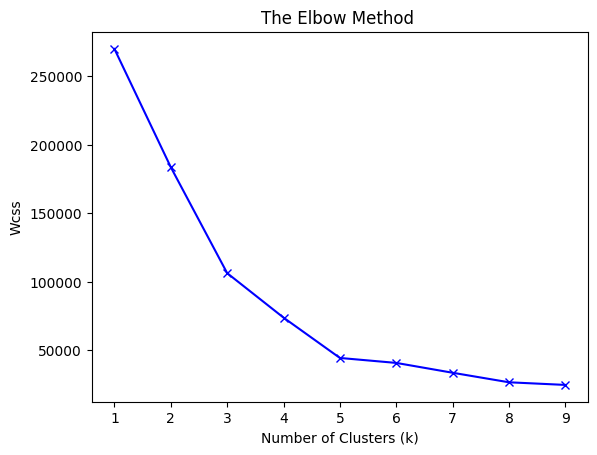

In [18]:
print("Wcss values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Wcss')
plt.title('The Elbow Method ')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_19096\384418294.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', i)
C:\Users\Dell\AppData\Local\Temp\ipykernel_19096\384418294.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', i)
C:\Users\Dell\AppData\Local\Temp\ipykernel_19096\384418294.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', i)
C:\Users\Dell\AppData\

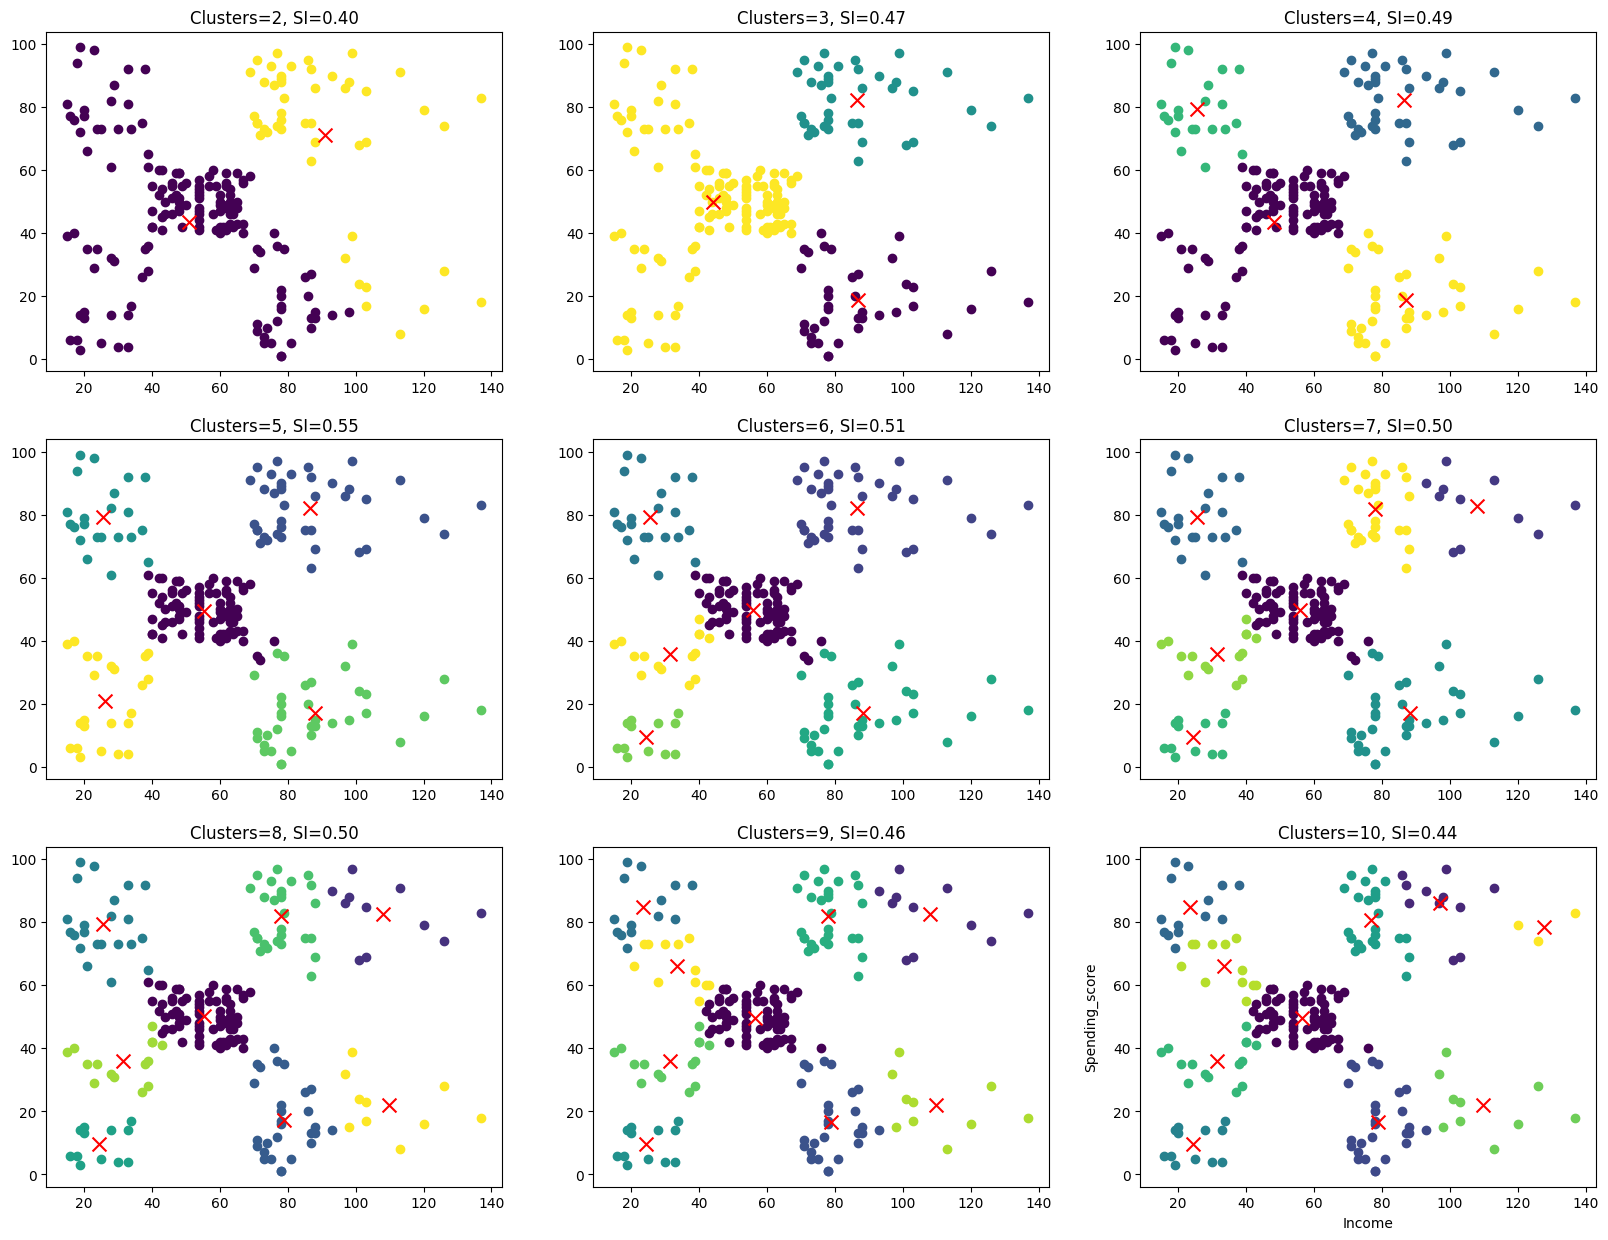

In [86]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
a = 0
b = 0
for i in range(2, 11):
    cmap = plt.cm.get_cmap('viridis', i)
    colors = [cmap(j) for j in range(i)] 
    
    k1 = KMeans(n_clusters=i, init='k-means++',max_iter=300, random_state=42)
    k1.fit(df_new)
    y1 = k1.fit_predict(df_new)
    labels_train = k1.labels_ 
    
    
    if len(np.unique(y1)) > 1:
       si = silhouette_score(df_new, y1)
    else:
        si = None
    
    centroids = k1.cluster_centers_
    
    for cluster in range(i):
        mask = (labels_train == cluster)
        axes[a, b].scatter(df_new.iloc[mask, 0], df_new.iloc[mask, 1], color=colors[cluster], label=f'Cluster {cluster}')  
    
    axes[a, b].scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
    axes[a, b].set_title(f"Clusters={i}, SI={si:.2f}" if si else f"Clusters={i} (SI=NaN)")
    
    
    b += 1
    if b > 2:
        a += 1
        b = 0

## from the graph and these visualization we can see that 5 clusters is the best numbers of cluster to divide the given data

## Now lets apply Dbscan

In [21]:
from sklearn.cluster import DBSCAN

In [73]:
eps_values = range(3,40)
min_samples_values = range(2,20)

best_score = -1
best_params = {}

# Manual grid search
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(df_new)
        
        # Exclude noise points for scoring
        if len(set(labels)) > 1 and np.any(labels != -1):
            mask = labels != -1
            try:
                score = silhouette_score(df_new[mask], labels[mask])
                print(f"eps={eps:.2f}, min_samples={min_samples} => Silhouette Score: {score:.4f}")
                
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}
            except:
                continue

print(" Best Parameters:")
print(best_params)
print(f" Best Silhouette Score: {best_score:.4f}")

eps=3.00, min_samples=2 => Silhouette Score: 0.4615
eps=3.00, min_samples=3 => Silhouette Score: 0.4097
eps=3.00, min_samples=4 => Silhouette Score: 0.4386
eps=3.00, min_samples=5 => Silhouette Score: 0.4653
eps=3.00, min_samples=6 => Silhouette Score: 0.5428
eps=3.00, min_samples=7 => Silhouette Score: 0.6145
eps=3.00, min_samples=8 => Silhouette Score: 0.5809
eps=4.00, min_samples=2 => Silhouette Score: 0.4683
eps=4.00, min_samples=3 => Silhouette Score: 0.4857
eps=4.00, min_samples=4 => Silhouette Score: 0.5192
eps=4.00, min_samples=5 => Silhouette Score: 0.5259
eps=4.00, min_samples=6 => Silhouette Score: 0.4361
eps=4.00, min_samples=7 => Silhouette Score: 0.3572
eps=4.00, min_samples=8 => Silhouette Score: 0.5525
eps=5.00, min_samples=2 => Silhouette Score: 0.3808
eps=5.00, min_samples=3 => Silhouette Score: 0.4460
eps=5.00, min_samples=4 => Silhouette Score: 0.5711
eps=5.00, min_samples=5 => Silhouette Score: 0.6182
eps=5.00, min_samples=6 => Silhouette Score: 0.6134
eps=5.00, mi

Silhouette Score (excluding noise): 0.723


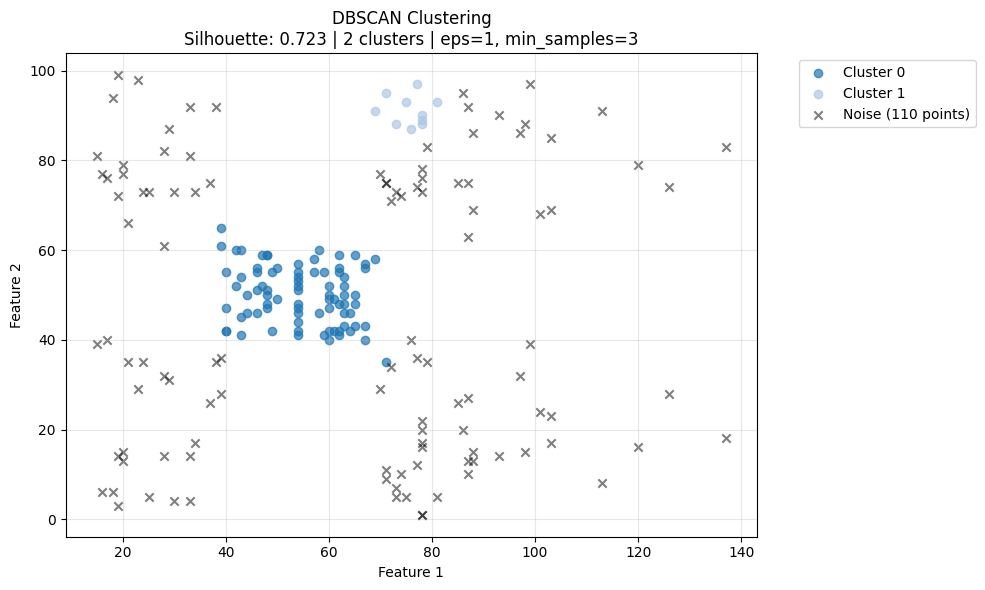

In [75]:
# DBSCAN clustering
db = DBSCAN(eps=7, min_samples=10)
labels = db.fit_predict(df_new)

# Remove noise for silhouette score (-1 labels)
mask = labels != -1
if len(set(labels[mask])) > 1:  # Need at least 2 clusters
    score = silhouette_score(df_new[mask], labels[mask])
    print(f"Silhouette Score (excluding noise): {score:.3f}")
    silhouette_msg = f"Silhouette: {score:.3f}"
else:
    print("Not enough clusters to compute silhouette score.")
    silhouette_msg = "Silhouette: N/A"

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

plt.figure(figsize=(10, 6))

cmap = plt.colormaps.get_cmap('tab20') 

# Plot each cluster
unique_labels = set(labels)
for k in unique_labels:
    cluster_mask = (labels == k)
    xy = df_new[cluster_mask]
    
    if k == -1:
        plt.scatter(xy.iloc[:, 0], xy.iloc[:, 1], c='k', marker='x', 
                   alpha=0.5, label=f'Noise ({n_noise} points)')
    else:
        plt.scatter(xy.iloc[:, 0], xy.iloc[:, 1], color=cmap(k % 20), 
                   alpha=0.7, label=f'Cluster {k}')

# Add title and labels
plt.title(f'DBSCAN Clustering\n{silhouette_msg} | {n_clusters} clusters | eps=1, min_samples=3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Improve legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Silhouette Score (excluding noise): 0.510


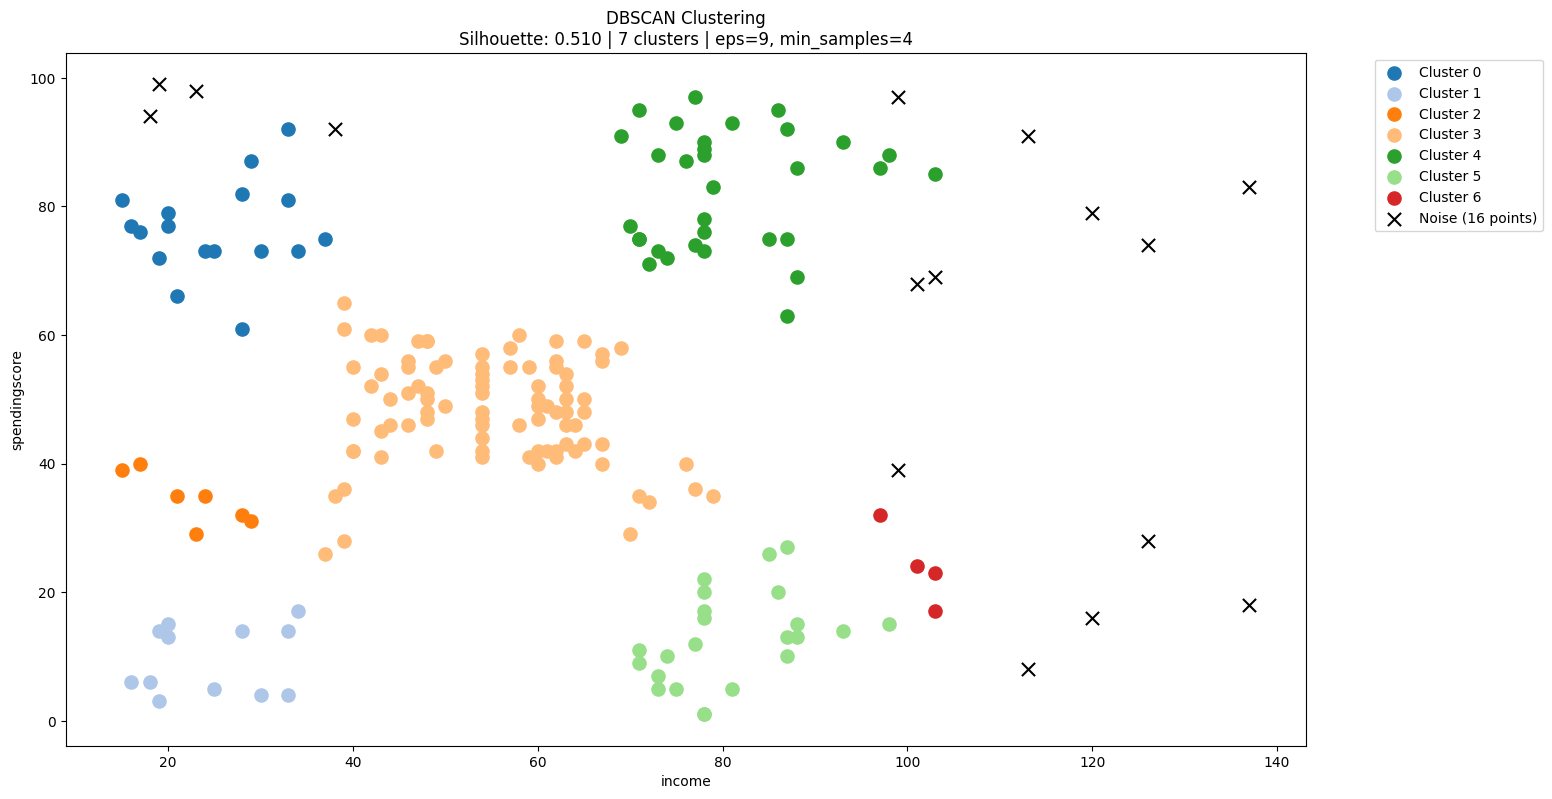

In [79]:
db = DBSCAN(eps=9, min_samples=4)
labels = db.fit_predict(df_new)  

# Remove noise for silhouette score (-1 labels)
mask = labels != -1
if len(set(labels[mask])) > 1: 
    score = silhouette_score(df_new[mask], labels[mask])
    print(f"Silhouette Score (excluding noise): {score:.3f}")
    silhouette_msg = f"Silhouette: {score:.3f}"
else:
    print("Not enough clusters to compute silhouette score.")
    silhouette_msg = "Silhouette: N/A"

# Count clusters excluding noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

# Create figure
plt.figure(figsize=(16, 9))
cmap = plt.colormaps.get_cmap('tab20')  # More colors than 'tab10'

# Plot each cluster
unique_labels = set(labels)
for k in unique_labels:
    cluster_mask = (labels == k)
    xy = df_new[cluster_mask]
    
    if k == -1:
        plt.scatter(xy.iloc[:, 0], xy.iloc[:, 1], c='k', marker='x', 
                   alpha=1, s=90, label=f'Noise ({n_noise} points)')
    else:
        plt.scatter(xy.iloc[:, 0], xy.iloc[:, 1], color=cmap(k % 20), 
                   alpha=1, s=90, label=f'Cluster {k}')

# Add title and labels
plt.title(f'DBSCAN Clustering\n{silhouette_msg} | {n_clusters} clusters | eps={db.eps}, min_samples={db.min_samples}')
plt.xlabel('income')
plt.ylabel('spendingscore')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## So, as we can see for this dataset, k-means clustering gave better clusters than the DBSCAN clustering. Silhouette score metric is not always a good estimate for dbscan clustering. we can use other metrics like DBCV or Density-based silhouette score, or HDBSCAN built-in validity score. Since our dataset is small, it becomes very hard to tune the best eps and min_sample values.

## Final Summary

So we can conclude that:
K-Means clustering works well for data that can be divided into convex-shaped clusters. it cannot detect noise and outliers. The cluster formation of k_ means clustering is easily interpretable. It cannot work well for messy or random-shaped data compared to DBSCAN.

Now, DBSCAN works well when clusters are irregular and messy. It is very useful for noise or outlier detection in a dataset. we do not need to initialize the no of clusters as it automatically finds the suitable number of clusters required. it can also work well for convex clusters if eps is tuned well. 